In [4]:
import scanpy as sc
import pandas as pd
import numpy as np
import anndata
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
# enables correct plotting of text
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42 

import warnings
warnings.simplefilter("ignore", UserWarning)

In [ ]:
'''
# Configure rpy2 to Use the Correct R Installation:
import os
os.environ['R_HOME'] = '/nfs/team205/kk18/miniconda3/envs/vitro/lib/R'
# check
from rpy2.rinterface_lib import openrlib
print(openrlib.R_HOME)
'''

In [ ]:
# import milopy.core as milo
# import milopy.plot as milopl
# import milopy.utils

In [ ]:
# import session_info
# session_info.show()

In [5]:
sc.settings.set_figure_params(dpi=80)

In [6]:
import importlib.util
import sys
spec = importlib.util.spec_from_file_location("module.name", "/nfs/team205/kk18/function/python/utils.py")
utils = importlib.util.module_from_spec(spec)
sys.modules["module.name"] = utils
spec.loader.exec_module(utils)

In [7]:
figdir = '/nfs/team205/heart/fetal_ms_figures/raw_plots_kk/Aug2024'
table_dir = '/nfs/team205/heart/fetal_ms_figures/tables/Aug2024'

# Read in adata

In [8]:
# atlas
adata = sc.read_h5ad('/nfs/team205/heart/anndata_objects/Foetal/trisomy21/Euploid_T21Hearts_Aug2024_sel_subsampled-per-cellstate-donor.h5ad')
adata

AnnData object with n_obs × n_vars = 83477 × 36601
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'sangerID', 'combinedID', 'donor', 'region', 'age', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'n_genes', 'n_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'HB_score', 'donor_by_library-prep', 'multiplexed', 'SOC | status', 'SOC | log_prob_singleton', 'SOC | log_prob_doublet', 'batch_key', '_scvi_batch', 'FACSgate', 'fine_grain', 'mid_grain', 'coarse_grain', 'sex', 'week', 'trimester', 'heart_or_greatvessels', 'cycling', 'S_score', 'G2M_score', 'phase', '_scvi_labels', 'stress_score', 'hb1_score', 'euploid_or_t21', 'donor_type', 'region_finest', 'flushed', 'scrublet_leiden', 'cluster_scrublet_score', 'leiden_scVI_0.1', 'leiden

In [19]:
basis = 'umap_correcting-donor-region_n-layers-2'

In [9]:
pd.crosstab(adata.obs['donor'],adata.obs['sangerID']).T

donor,Hst32,Hst33,Hst36,Hst40,Hst42,Hst44,Hst48
sangerID,,,,,,,
7089STDY13216920,0,0,0,2283,0,0,0
7089STDY13216921,0,0,0,2015,0,0,0
7089STDY13216922,0,0,1419,1449,0,0,0
7089STDY13216923,0,0,0,1,0,0,0
7089STDY13216925,0,0,0,2174,0,0,0
7089STDY13216927,0,0,4843,0,0,0,0
BHF_F_Hea11933666,0,4392,0,0,0,0,0
BHF_F_Hea11933667,0,4801,0,0,0,0,0
BHF_F_Hea11933668,0,4566,0,0,0,0,0


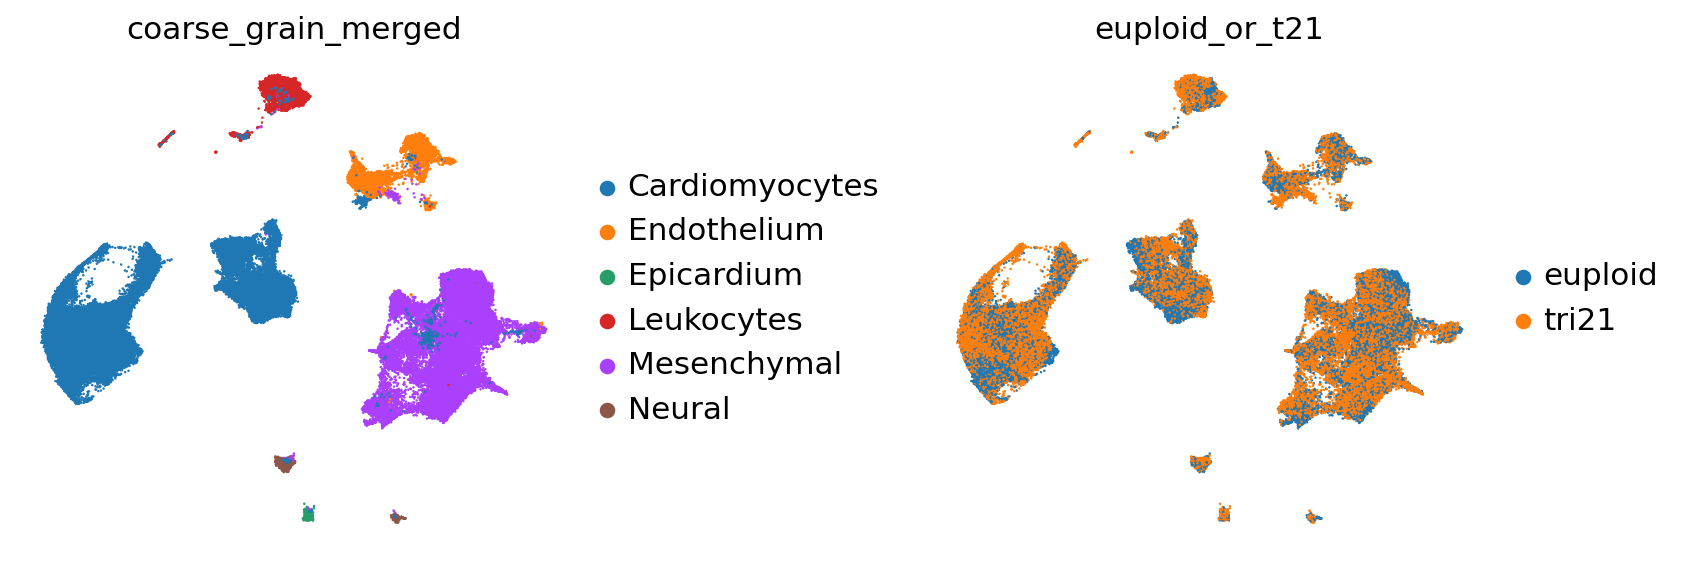

In [10]:
sc.pl.embedding(adata, basis=basis,
                    color=['coarse_grain_merged','euploid_or_t21'],
               size=5, wspace=0.5, ncols=6, components='all',cmap='RdPu',frameon=False,legend_fontsize=14)

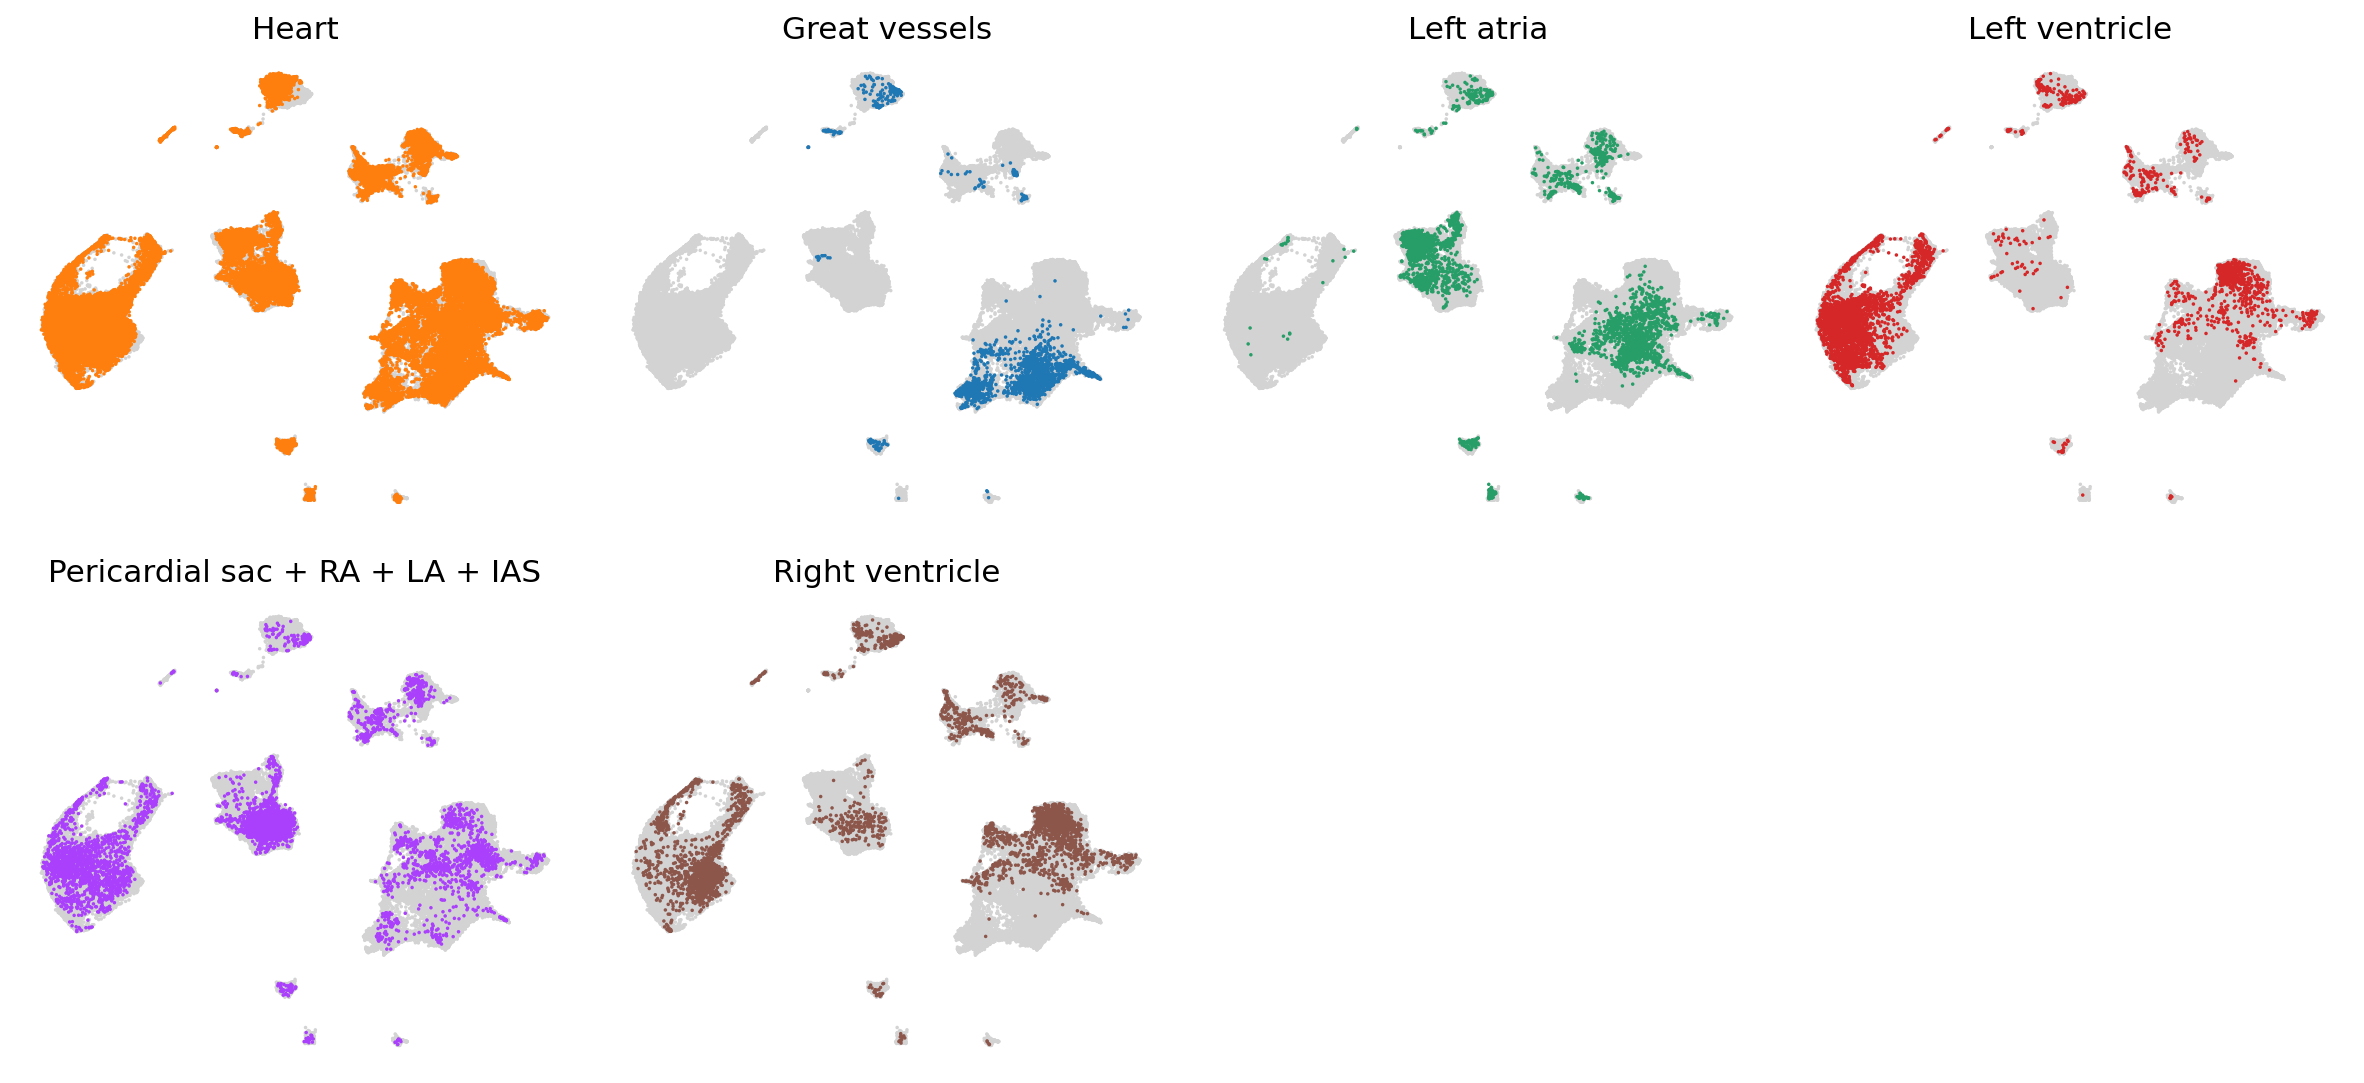

In [11]:
# umap per celltype to highlight
group_col = 'region'
groups_to_plot = ['Heart',
                  'Great vessels', 
                 'Left atria',
                 'Left ventricle',
                 'Pericardial sac + RA + LA + IAS',
                 'Right ventricle',
                  # 'Pericardium',
                 ]

plt.rcParams['axes.grid'] = False
fig,axs=plt.subplots(nrows=2,ncols=4,figsize=(15,7))
# Flatten the axs array for easier iteration in case of multiple rows and columns
axs_flat = axs.flatten()

for i,grp in enumerate(groups_to_plot):
    sc.pl.embedding(adata, basis=basis,
                    color=[group_col], groups=grp, 
               size=10, frameon=False,
               show=False, ax=axs_flat[i], legend_loc=None, legend_fontsize=5,
               title=grp
              )
# Turn off any remaining subplots
for j in range(len(groups_to_plot), len(axs_flat)):
    fig.delaxes(axs_flat[j])

# fig.suptitle('Main Title for the Figure')
fig.tight_layout()

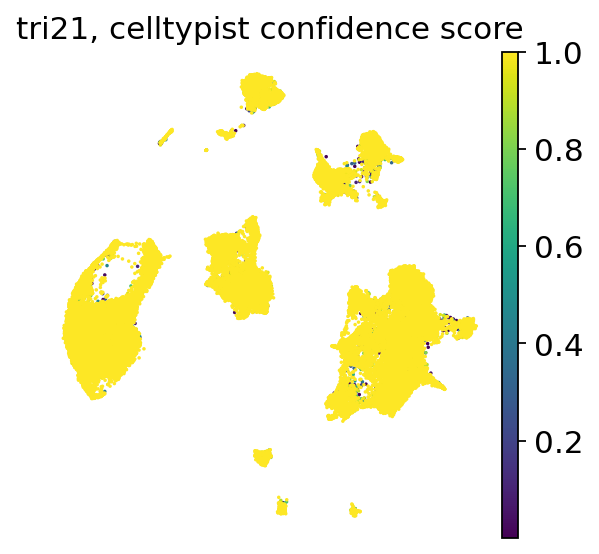

In [12]:
sc.pl.embedding(adata[adata.obs['euploid_or_t21']=='tri21'], 
                basis=basis,
                    color=['conf_score_fine'], 
               size=10, wspace=0.4, ncols=6, components='all',frameon=False,legend_fontsize=30, title='tri21, celltypist confidence score')

# Milo

## scVI - n_layers:2

In [14]:
adata.obs['euploid_or_t21'].cat.categories

Index(['euploid', 'tri21'], dtype='object')

In [31]:
%%time
scVI_latent_rep = 'scVI_latent_correcting-donor-region_n-layers-2'
# compute the k-nearest-neighbor graph that is used in both clustering and umap algorithms
sc.pp.neighbors(adata, use_rep=scVI_latent_rep, n_neighbors=20, key_added=f"{scVI_latent_rep}-forMilo")
# Construct neighbourhoods
milo.make_nhoods(adata, neighbors_key=f"{scVI_latent_rep}-forMilo", prop=0.1)
# Count cells in neighbourhoods
# Milo leverages the variation in cell numbers between replicates for the same experimental condition to test for differential abundance. 
milo.count_nhoods(adata, sample_col="sangerID")
# Test for differential abundance between conditions
milo.DA_nhoods(adata, design="~ euploid_or_t21")
## Check results
milo_results = adata.uns["nhood_adata"].obs
milo_results

CPU times: user 24.7 s, sys: 423 ms, total: 25.1 s
Wall time: 26.2 s


,index_cell,kth_distance,logFC,logCPM,F,PValue,FDR,SpatialFDR
0,BHF_F_Hea13188327_BHF_F_Hea13187629_AGTTACATCG...,2.449528,0.763651,8.902761,0.828498,0.362709,0.663825,0.667458
1,BHF_F_Hea13188321_BHF_F_Hea13187623_CTAGCTGAGC...,2.246291,0.688758,9.293821,0.665216,0.414726,0.703436,0.706648
2,BHF_F_Hea14680692_BHF_F_Hea14668476_AACGCTAGTC...,2.362953,3.631018,9.161464,12.894721,0.000330,0.016464,0.018169
3,BHF_F_Hea14680688_BHF_F_Hea14668472_ACGGTTAGTT...,1.745542,0.361687,9.555173,0.181288,0.670269,0.871090,0.872833
4,7089STDY13216927_BHF_F_Hea13242534_ATCCTGACATA...,2.110794,1.829774,9.134564,4.256501,0.039102,0.217950,0.223163
...,...,...,...,...,...,...,...,...
6688,BHF_F_Hea14680690_BHF_F_Hea14668474_TATAGCTCAA...,2.312479,1.506667,8.791257,3.094665,0.078551,0.311460,0.315597
6689,BHF_F_Hea13188327_BHF_F_Hea13187629_GTCTATGCAG...,1.789070,2.533266,9.178553,7.543584,0.006023,0.078430,0.082139
6690,BHF_F_Hea14680688_BHF_F_Hea14668472_TGTAAGTGTG...,1.782826,2.185785,9.093169,5.729510,0.016683,0.139229,0.144157
6691,BHF_F_Hea14680690_BHF_F_Hea14668474_CCTTTAGTCG...,2.389360,0.451099,9.125332,0.285810,0.592919,0.825343,0.827395


<Axes: >

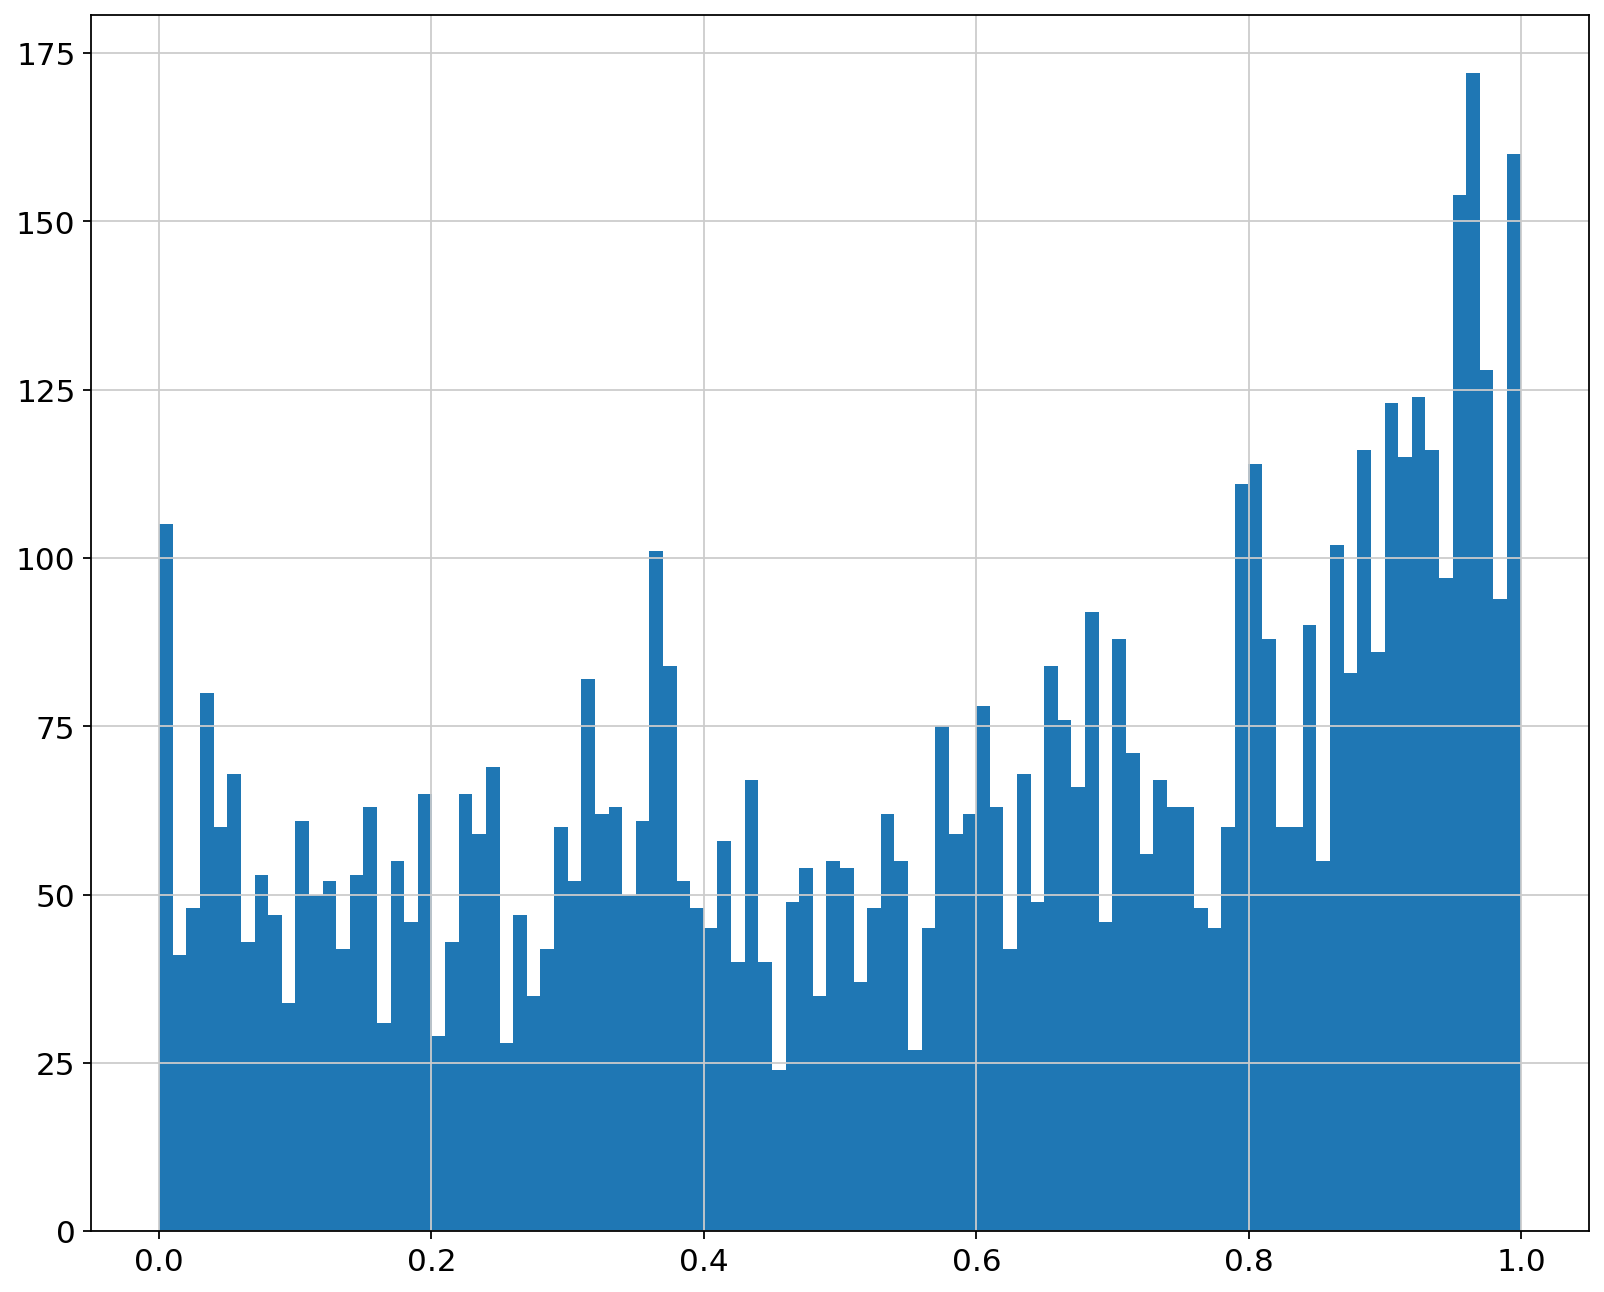

In [32]:
milo_results['SpatialFDR'].hist(bins=100)

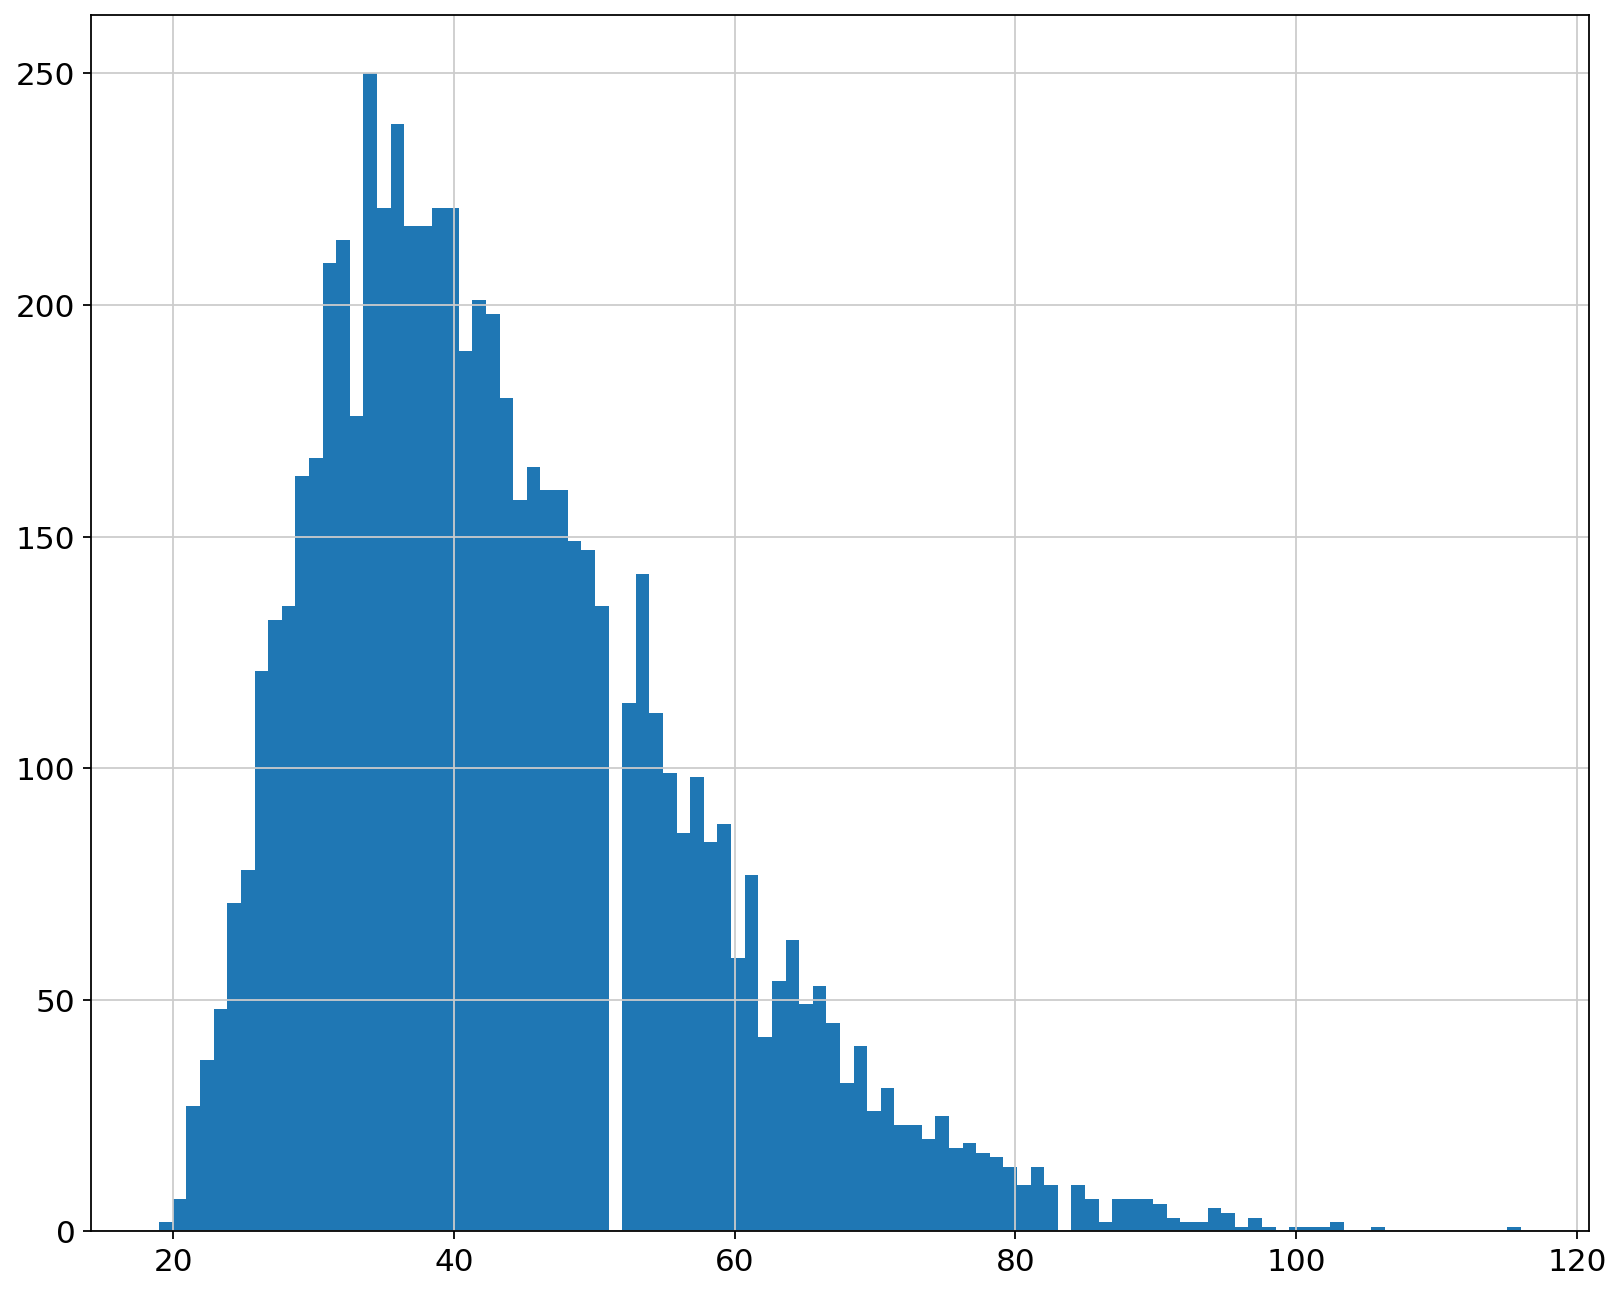

In [33]:
nhood_size = np.array(adata.obsm["nhoods"].sum(0)).ravel()
plt.hist(nhood_size, bins=100);

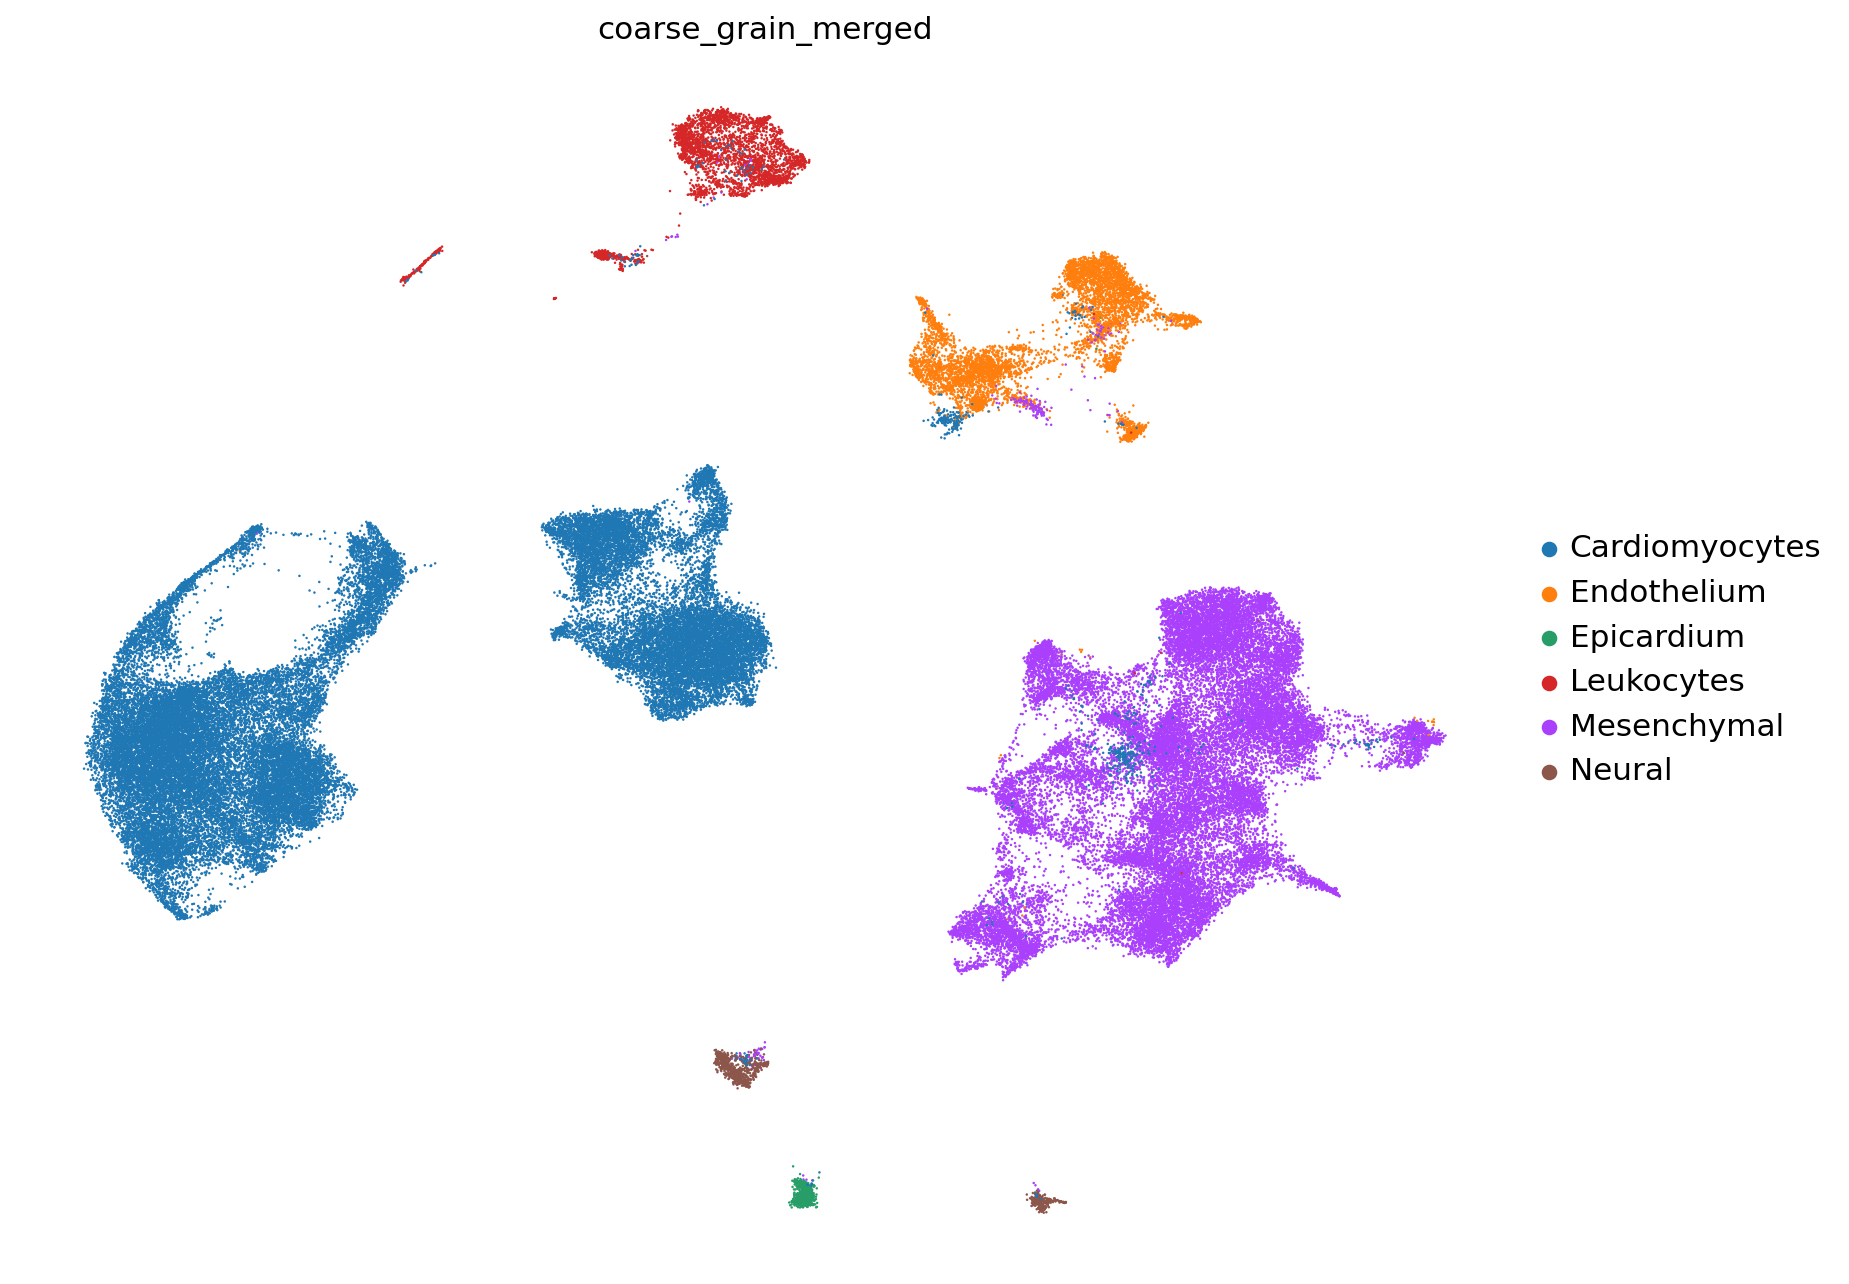

In [34]:
sc.pl.embedding(adata, basis=basis,
                    color=['coarse_grain_merged'],
               size=5, wspace=0.5, ncols=6, components='all',cmap='RdPu',frameon=False,legend_fontsize=14)

CPU times: user 792 ms, sys: 8.5 ms, total: 801 ms
Wall time: 1.22 s


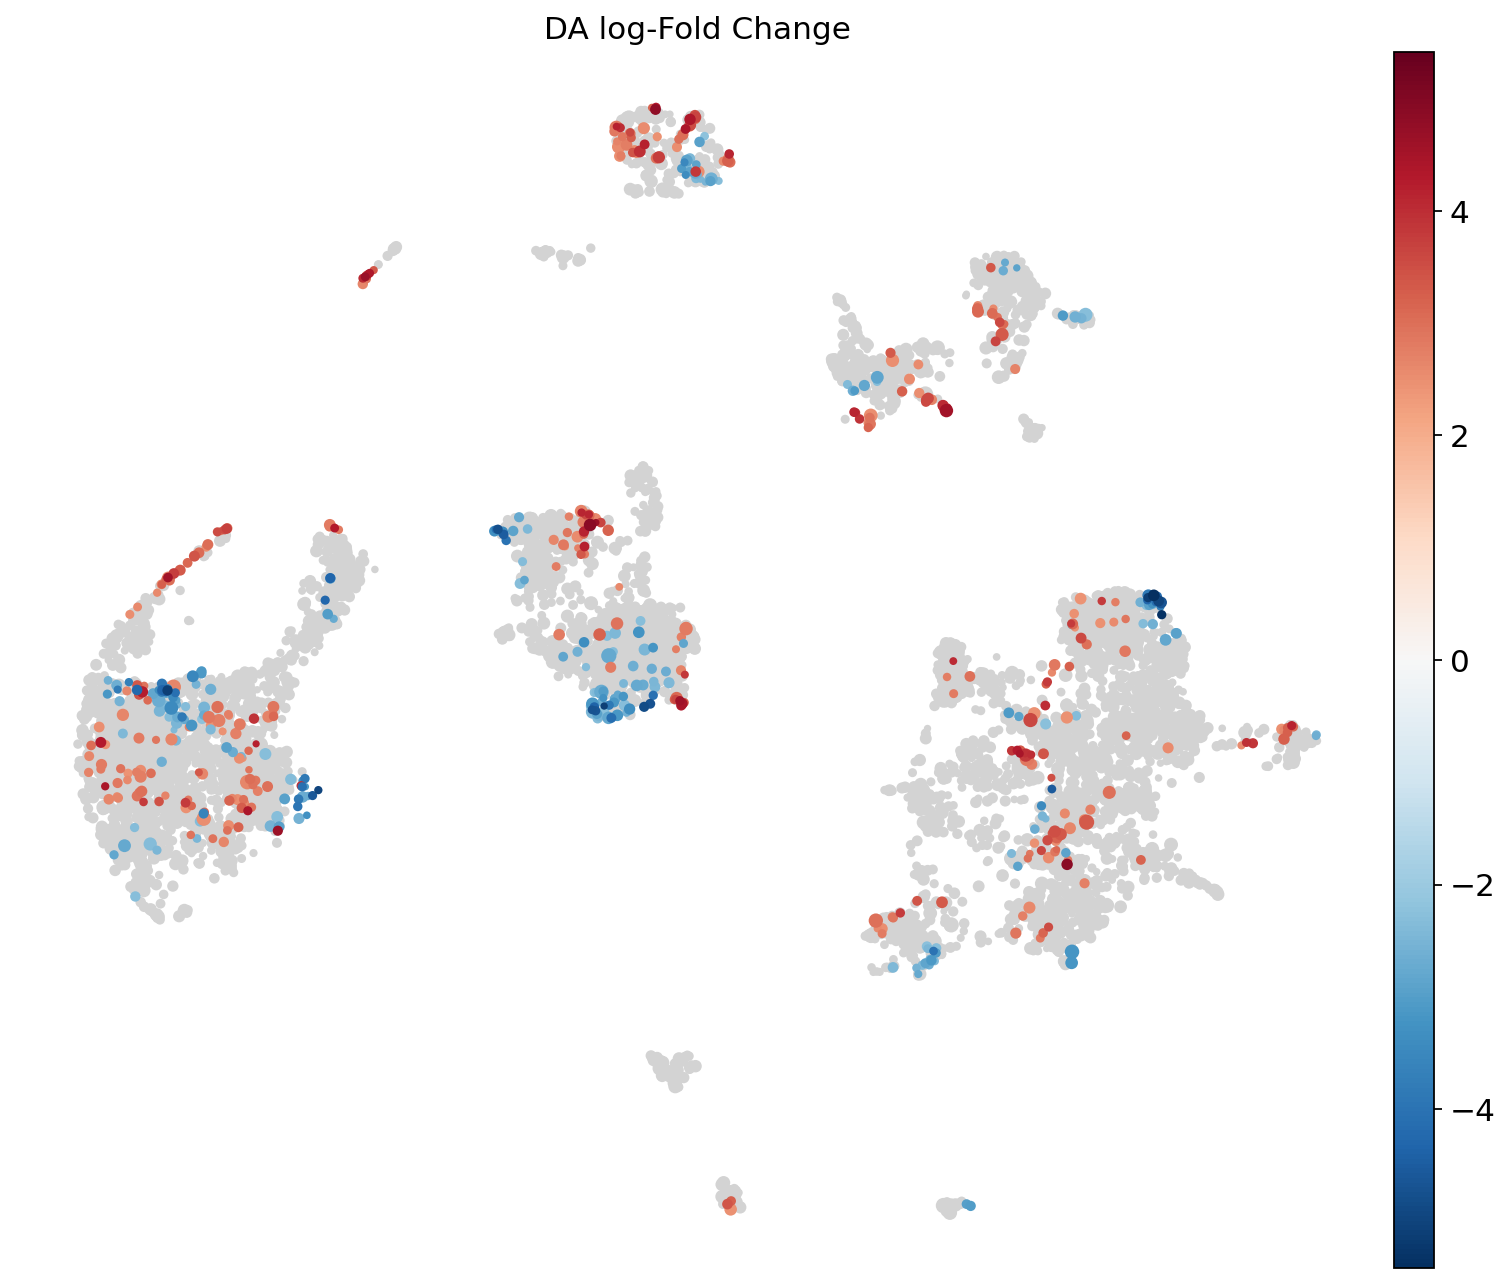

In [50]:
%%time
# Visualize results on UMAP embedding
milopy.utils.build_nhood_graph(adata,basis=f'X_{basis}')
plt.rcParams["figure.figsize"] = [12,10]
milopl.plot_nhood_graph(adata, 
                        alpha=0.1, ## SpatialFDR level
                        min_size=2, ## Size of smallest dot
                        show=False
                       )
plt.savefig(f'{figdir}/Tri21_RNA_Milo_UMAP.pdf', bbox_inches="tight",dpi=300)

--> logFC<0 is euploid

In [36]:
milopy.utils.annotate_nhoods(adata, anno_col='fine_grain_merged')

In [37]:
adata_copy = adata.copy()
milopy.utils.annotate_nhoods(adata_copy, anno_col='euploid_or_t21')
df = adata_copy.uns['nhood_adata'].obs.copy()
df[df['SpatialFDR']<0.1]

,index_cell,kth_distance,logFC,logCPM,F,PValue,FDR,SpatialFDR,Nhood_size,nhood_annotation,nhood_annotation_frac
2,BHF_F_Hea14680692_BHF_F_Hea14668476_AACGCTAGTC...,2.362953,3.631018,9.161464,12.894721,0.000330,0.016464,0.018169,38.0,tri21,0.973684
20,BHF_F_Hea14680688_BHF_F_Hea14668472_GATAACGAGT...,1.979213,2.826435,9.256904,8.672709,0.003231,0.054942,0.058402,43.0,tri21,0.930233
36,BHF_F_Hea14680688_BHF_F_Hea14668472_CTGTGTGAGA...,2.074173,2.605988,9.132075,7.687537,0.005561,0.075344,0.079058,36.0,tri21,0.916667
53,BHF_F_Hea14680688_BHF_F_Hea14668472_TCTAATCTCT...,2.259254,3.094715,9.145433,10.162407,0.001434,0.036346,0.039289,37.0,tri21,0.945946
58,7089STDY13216920_BHF_F_Hea13242527_TGGAACAAGTG...,2.059709,-3.345544,8.989432,14.045895,0.000178,0.010562,0.011757,28.0,euploid,0.928571
...,...,...,...,...,...,...,...,...,...,...,...
6641,BHF_F_Hea11933667_BHF_F_Hea11596620_TTTGTCTAGC...,1.941642,-3.595036,9.069469,15.706462,0.000074,0.005968,0.006713,33.0,euploid,0.939394
6670,BHF_F_Hea14680688_BHF_F_Hea14668472_GGTTTAATCT...,1.951263,3.615818,9.105361,12.963729,0.000318,0.016158,0.017785,38.0,tri21,0.973684
6671,BHF_F_Hea14680688_BHF_F_Hea14668472_AGTTTGATCG...,2.069945,2.495260,9.036834,7.312834,0.006847,0.084867,0.088809,34.0,tri21,0.911765
6680,BHF_F_Hea11933667_BHF_F_Hea11596620_TACGTTAAGA...,1.990189,-2.336125,9.130903,7.564947,0.005952,0.077961,0.081632,37.0,euploid,0.810811


Text(0.5, 0, 'celltype fraction')

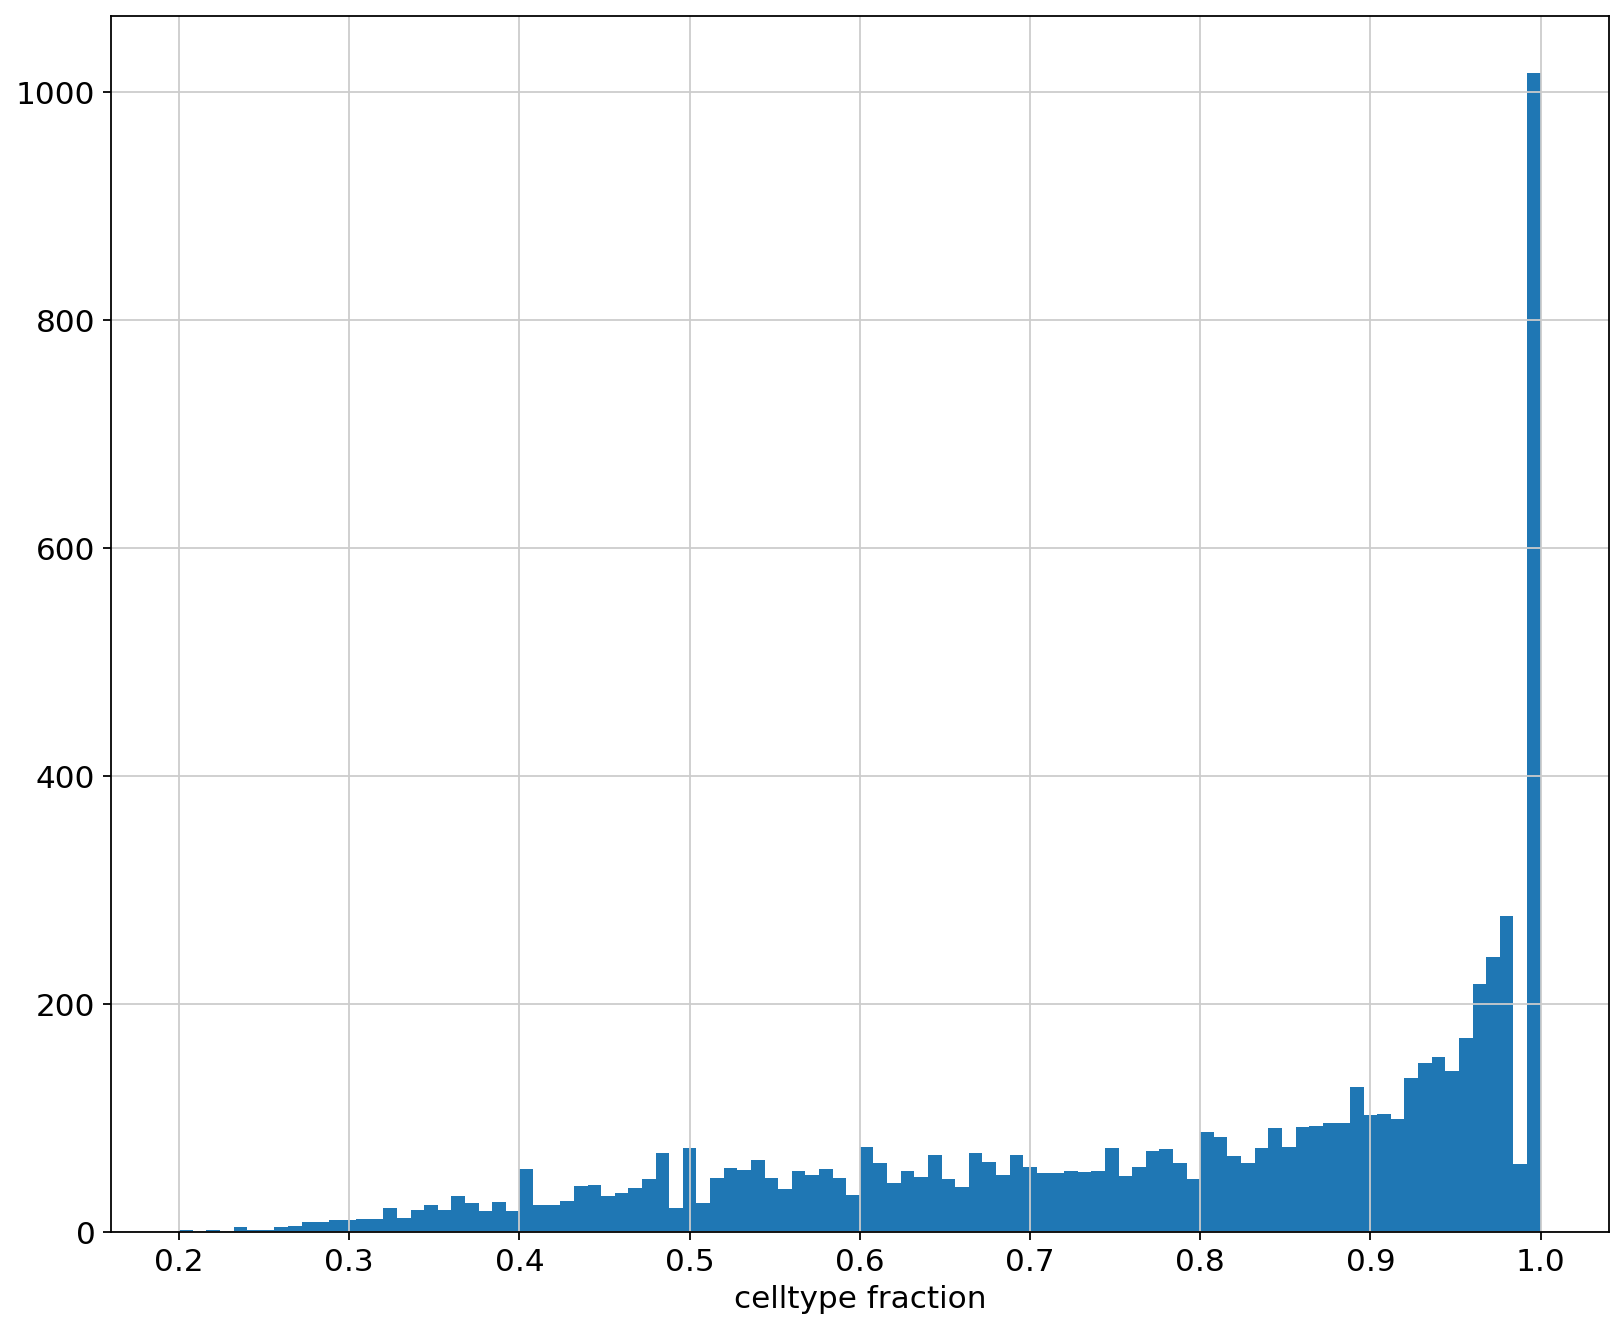

In [38]:
plt.hist(adata.uns['nhood_adata'].obs["nhood_annotation_frac"],bins=100);
plt.xlabel("celltype fraction")

In [39]:
# We can see that for the majority of neighbourhoods, almost all cells have the same neighbourhood. We can rename neighbourhoods where less than 60% of the cells have the top label as "Mixed"
adata.uns['nhood_adata'].obs.loc[adata.uns['nhood_adata'].obs["nhood_annotation_frac"] < 0.6, "nhood_annotation"] = "Mixed"

In [40]:
# save
# modify nhood names
adata.uns['nhood_adata'].obs_names = 'nhood'+adata.uns['nhood_adata'].obs_names
adata.write('/nfs/team205/heart/anndata_objects/Foetal/trisomy21/Euploid_T21Hearts_Aug2024_sel_subsampled-per-cellstate-donor.h5ad')
adata.uns['nhood_adata'].obs.head()

,index_cell,kth_distance,logFC,logCPM,F,PValue,FDR,SpatialFDR,Nhood_size,nhood_annotation,nhood_annotation_frac
nhood0,BHF_F_Hea13188327_BHF_F_Hea13187629_AGTTACATCG...,2.449528,0.763651,8.902761,0.828498,0.362709,0.663825,0.667458,24.0,AtrialCardiomyocytesCycling,0.666667
nhood1,BHF_F_Hea13188321_BHF_F_Hea13187623_CTAGCTGAGC...,2.246291,0.688758,9.293821,0.665216,0.414726,0.703436,0.706648,49.0,AtrialCardiomyocytesCycling,0.795918
nhood2,BHF_F_Hea14680692_BHF_F_Hea14668476_AACGCTAGTC...,2.362953,3.631018,9.161464,12.894721,0.000330,0.016464,0.018169,38.0,AtrialCardiomyocytesRight,0.842105
nhood3,BHF_F_Hea14680688_BHF_F_Hea14668472_ACGGTTAGTT...,1.745542,0.361687,9.555173,0.181288,0.670269,0.871090,0.872833,66.0,AtrialCardiomyocytesCycling,0.651515
nhood4,7089STDY13216927_BHF_F_Hea13242534_ATCCTGACATA...,2.110794,1.829774,9.134564,4.256501,0.039102,0.217950,0.223163,38.0,AtrialCardiomyocytesCycling,0.842105


In [8]:
adata = sc.read_h5ad('/nfs/team205/heart/anndata_objects/Foetal/trisomy21/Euploid_T21Hearts_Aug2024_sel_subsampled-per-cellstate-donor.h5ad')
adata.uns['nhood_adata'].obs.head()

,index_cell,kth_distance,logFC,logCPM,F,PValue,FDR,SpatialFDR,Nhood_size,nhood_annotation,nhood_annotation_frac
nhood0,BHF_F_Hea13188327_BHF_F_Hea13187629_AGTTACATCG...,2.449528,0.763651,8.902761,0.828498,0.362709,0.663825,0.667458,24.0,AtrialCardiomyocytesCycling,0.666667
nhood1,BHF_F_Hea13188321_BHF_F_Hea13187623_CTAGCTGAGC...,2.246291,0.688758,9.293821,0.665216,0.414726,0.703436,0.706648,49.0,AtrialCardiomyocytesCycling,0.795918
nhood2,BHF_F_Hea14680692_BHF_F_Hea14668476_AACGCTAGTC...,2.362953,3.631018,9.161464,12.894721,0.000330,0.016464,0.018169,38.0,AtrialCardiomyocytesRight,0.842105
nhood3,BHF_F_Hea14680688_BHF_F_Hea14668472_ACGGTTAGTT...,1.745542,0.361687,9.555173,0.181288,0.670269,0.871090,0.872833,66.0,AtrialCardiomyocytesCycling,0.651515
nhood4,7089STDY13216927_BHF_F_Hea13242534_ATCCTGACATA...,2.110794,1.829774,9.134564,4.256501,0.039102,0.217950,0.223163,38.0,AtrialCardiomyocytesCycling,0.842105


In [6]:
# from CamU
adata = sc.read_h5ad('/rfs/project/rfs-iCNyzSAaucw/kk837/data_objects/Foetal/trisomy21/Euploid_T21Hearts_Aug2024_sel_subsampled-per-cellstate-donor.h5ad')
adata.uns['nhood_adata'].obs.head()

,index_cell,kth_distance,logFC,logCPM,F,PValue,FDR,SpatialFDR,Nhood_size,nhood_annotation,nhood_annotation_frac
nhood0,BHF_F_Hea13188327_BHF_F_Hea13187629_AGTTACATCG...,2.449528,0.763651,8.902761,0.828498,0.362709,0.663825,0.667458,24.0,AtrialCardiomyocytesCycling,0.666667
nhood1,BHF_F_Hea13188321_BHF_F_Hea13187623_CTAGCTGAGC...,2.246291,0.688758,9.293821,0.665216,0.414726,0.703436,0.706648,49.0,AtrialCardiomyocytesCycling,0.795918
nhood2,BHF_F_Hea14680692_BHF_F_Hea14668476_AACGCTAGTC...,2.362953,3.631018,9.161464,12.894721,0.000330,0.016464,0.018169,38.0,AtrialCardiomyocytesRight,0.842105
nhood3,BHF_F_Hea14680688_BHF_F_Hea14668472_ACGGTTAGTT...,1.745542,0.361687,9.555173,0.181288,0.670269,0.871090,0.872833,66.0,AtrialCardiomyocytesCycling,0.651515
nhood4,7089STDY13216927_BHF_F_Hea13242534_ATCCTGACATA...,2.110794,1.829774,9.134564,4.256501,0.039102,0.217950,0.223163,38.0,AtrialCardiomyocytesCycling,0.842105


In [7]:
figdir = '/rfs/project/rfs-iCNyzSAaucw/kk837/notebooks/Foetal/fetal_ms_figures'

# Plot

In [8]:
# map cell type name to short versions
df = pd.read_csv('/rfs/project/rfs-iCNyzSAaucw/kk837/notebooks/Foetal/finegrain_name_mapping.csv').set_index('Full_name')
mapping = df['Short_name_finalised'].to_dict()
adata.uns['nhood_adata'].obs.replace({'nhood_annotation':mapping},inplace=True)

/tmp/ipykernel_293470/1713106557.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  list(data.groupby('nhood_annotation').sum().sort_values('significant',ascending=False).index)
/tmp/ipykernel_293470/1713106557.py:38: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=data, x='logFC', y='nhood_annotation', inner='box', scale='width', color='lightgray')


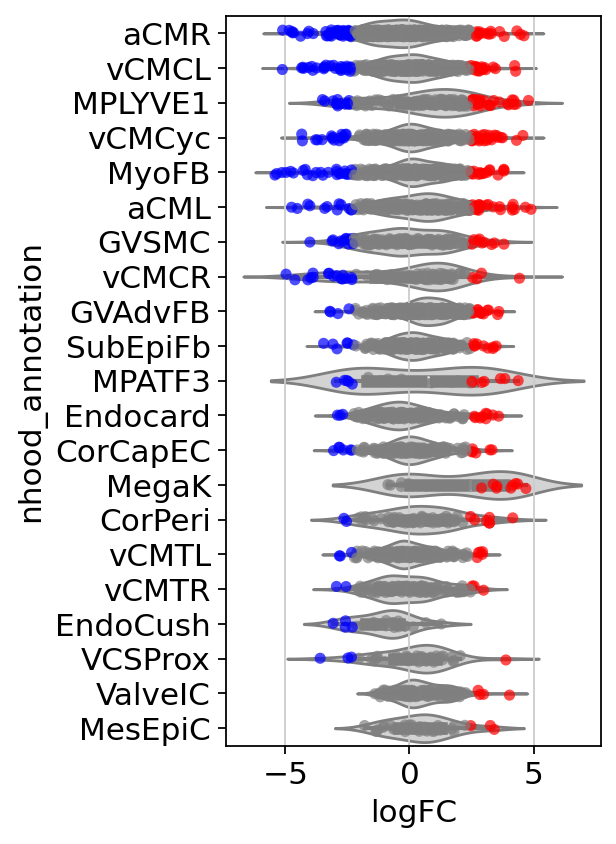

In [9]:
# drop cell types which have lower than certain number of significant nhoods
sig_nhoods_thresh = 3

ad = adata.uns['nhood_adata'].copy()

data = ad.obs[['SpatialFDR','nhood_annotation','logFC']]
data = data[data['nhood_annotation']!='Mixed']
# drop cell types which has lower than 3 nhood
val_counts = data['nhood_annotation'].value_counts()
data = data[data['nhood_annotation'].isin(list(val_counts.index[val_counts>=3]))]
# highlight significant nhoods
mask_sig = data['SpatialFDR'] < 0.1
mask_eup = data['logFC'] < 0
mask_t21 = data['logFC'] > 0
nhoods_eup = list(data.index[mask_sig&mask_eup])
nhoods_t21 = list(data.index[mask_sig&mask_t21])
data['nhood_type'] = 'mixture'
data.loc[nhoods_eup,'nhood_type'] = 'euploid'
data.loc[nhoods_t21,'nhood_type'] = 'tri21'

# select cell types based on the number of significant nhoods
data['significant'] = data['SpatialFDR'] < 0.1 # to count number of significant nhood
sig_counts = data[['nhood_annotation','significant']].groupby('nhood_annotation').sum()
mask = sig_counts['significant'] >= sig_nhoods_thresh
cells_sel = sig_counts.index[mask]
data = data[data['nhood_annotation'].isin(cells_sel)]

# reorder cell types based on the number of significant nhoods
data['nhood_annotation'] = data['nhood_annotation'].astype('category')
data['nhood_annotation'] = data['nhood_annotation'].cat.reorder_categories(
    list(data.groupby('nhood_annotation').sum().sort_values('significant',ascending=False).index)
)

# Set the size of the plot
plt.figure(figsize=(3, 6))

# Create the violin plot
sns.violinplot(data=data, x='logFC', y='nhood_annotation', inner='box', scale='width', color='lightgray')

# Add jittered points without dodge to align them on the same y-axis location
sns.stripplot(data=data, x='logFC', y='nhood_annotation', jitter=True, size=5,
              hue='nhood_type', palette={'euploid': 'blue', 
                                         'mixture': 'gray',
                                         'tri21': 'red'
                                        }, 
              marker='o', alpha=0.7)

# Remove the legend created by hue
plt.legend([],[], frameon=False)
# Display the plot
# plt.title(comp)
plt.savefig(f'{figdir}/Tri21_RNA_Milo_beeswarm_sort_by_n-significant_celltype-selected.pdf', bbox_inches="tight",dpi=300)
plt.show()

/tmp/ipykernel_293470/2917940356.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  list(data.groupby('nhood_annotation').sum().sort_values('significant',ascending=False).index)
/tmp/ipykernel_293470/2917940356.py:32: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=data, x='logFC', y='nhood_annotation', inner='box', scale='width', color='lightgray')


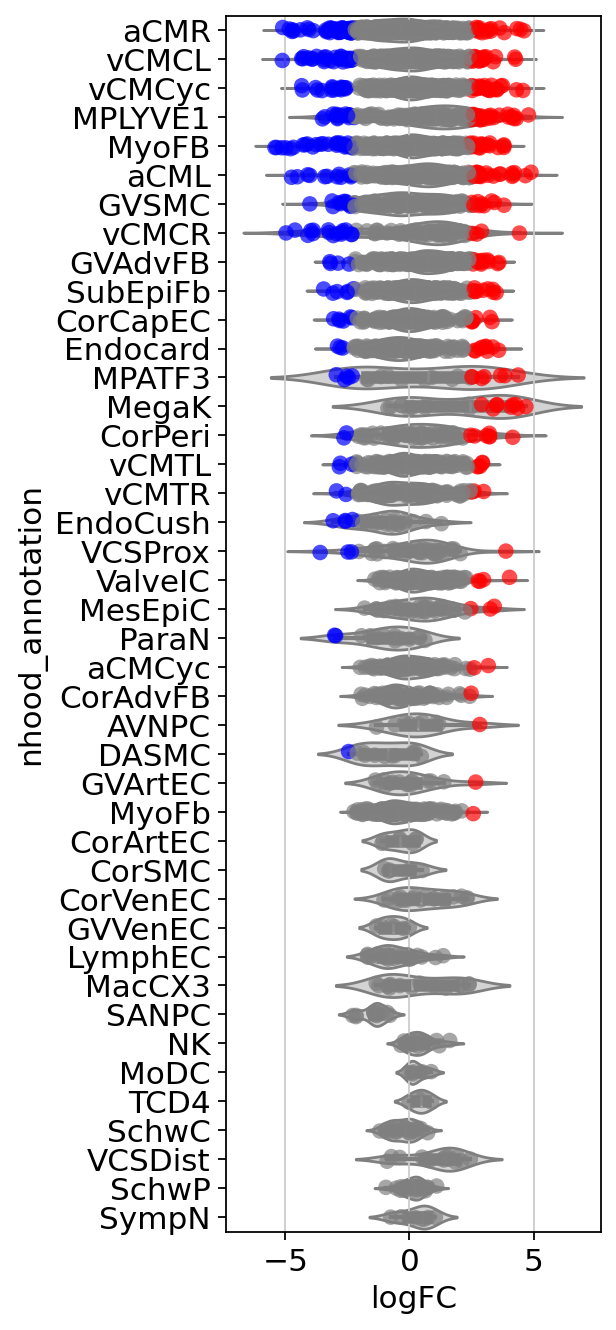

In [10]:
# all the cell types

ad = adata.uns['nhood_adata'].copy()

data = ad.obs[['SpatialFDR','nhood_annotation','logFC']]
data = data[data['nhood_annotation']!='Mixed']
# drop cell types which has lower than 3 nhood
val_counts = data['nhood_annotation'].value_counts()
data = data[data['nhood_annotation'].isin(list(val_counts.index[val_counts>=3]))]
# highlight significant nhoods
mask_sig = data['SpatialFDR'] < 0.1
mask_eup = data['logFC'] < 0
mask_t21 = data['logFC'] > 0
nhoods_eup = list(data.index[mask_sig&mask_eup])
nhoods_t21 = list(data.index[mask_sig&mask_t21])
data['nhood_type'] = 'mixture'
data.loc[nhoods_eup,'nhood_type'] = 'euploid'
data.loc[nhoods_t21,'nhood_type'] = 'tri21'

# reorder based on number of significant nhoods
# reorder cell types
data['nhood_annotation'] = data['nhood_annotation'].astype('category')
data['significant'] = data['SpatialFDR'] < 0.1 # to count number of significant nhood
data['nhood_annotation'] = data['nhood_annotation'].cat.reorder_categories(
    list(data.groupby('nhood_annotation').sum().sort_values('significant',ascending=False).index)
)

# Set the size of the plot
plt.figure(figsize=(3, 10))

# Create the violin plot
sns.violinplot(data=data, x='logFC', y='nhood_annotation', inner='box', scale='width', color='lightgray')

# Add jittered points without dodge to align them on the same y-axis location
sns.stripplot(data=data, x='logFC', y='nhood_annotation', jitter=True, size=7,
              hue='nhood_type', palette={'euploid': 'blue', 
                                         'mixture': 'gray',
                                         'tri21': 'red'
                                        }, 
              marker='o', alpha=0.7)

# Remove the legend created by hue
plt.legend([],[], frameon=False)
# Display the plot
# plt.title(comp)
# plt.savefig(f'{figdir}/Tri21_RNA_Milo_beeswarm_sort_by_n-significant.pdf', bbox_inches="tight",dpi=300)
plt.show()